2025-03-30 12:02:16.936252: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-30 12:02:16.947942: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743307336.967499   36918 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743307336.973066   36918 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743307336.986937   36918 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Training with SGD...


I0000 00:00:1743307341.664683   37033 service.cc:152] XLA service 0x55d014050220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743307341.664831   37033 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-03-30 12:02:21.706648: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743307341.780970   37033 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1743307342.159281   37033 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Training with Adagrad...
Training with RMSprop...
Training with Adadelta...
Training with Adam...
Training with AdamW...


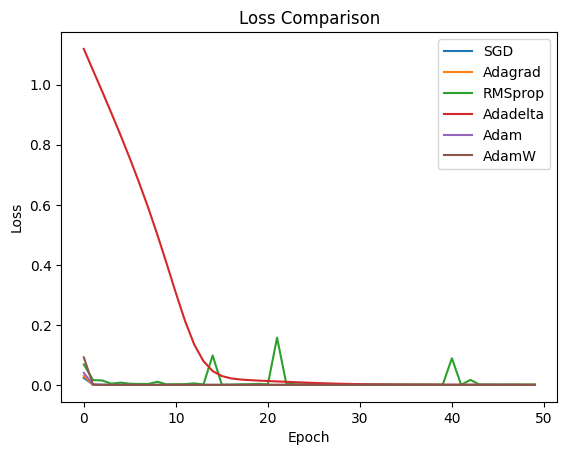

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential


def generate_sin_wave(seq_length, num_samples):
    X, Y = [], []
    for i in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        x = np.sin(np.linspace(start, start + np.pi, seq_length))
        y = np.sin(start + np.pi)
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)


SEQ_LENGTH = 20  #  輸入的時間步長
NUM_SAMPLES = 1000  # 訓練數據量
X_train, Y_train = generate_sin_wave(SEQ_LENGTH, NUM_SAMPLES)
X_train = np.expand_dims(X_train, axis=-1)
# 轉換為 (batch, seq_length, features)
Y_train = np.expand_dims(Y_train, axis=-1)  # (batch, 1)


def create_model(optimizer):
    model = Sequential(
        [
            SimpleRNN(32, return_sequences=False, input_shape=(SEQ_LENGTH, 1)),
            Dense(1),  # 輸出層
        ]
    )
    model.compile(loss="mse", optimizer=optimizer)
    return model


# 創建6個模型
model_sgd = create_model(optimizer=keras.optimizers.SGD(learning_rate=0.01))
model_adagrad = create_model(optimizer=keras.optimizers.Adagrad(learning_rate=0.01))
model_rmsprop = create_model(optimizer=keras.optimizers.RMSprop(learning_rate=0.01))
model_adadelta = create_model(optimizer=keras.optimizers.Adadelta(learning_rate=0.01))
model_adam = create_model(optimizer=keras.optimizers.Adam(learning_rate=0.01))
model_adamw = create_model(optimizer=keras.optimizers.AdamW(learning_rate=0.01))
print("Training with SGD...")
history_sgd = model_sgd.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0)
print("Training with Adagrad...")
history_adagrad = model_adagrad.fit(
    X_train, Y_train, epochs=50, batch_size=32, verbose=0
)
print("Training with RMSprop...")
history_rmsprop = model_rmsprop.fit(
    X_train, Y_train, epochs=50, batch_size=32, verbose=0
)
print("Training with Adadelta...")
history_adadelta = model_adadelta.fit(
    X_train, Y_train, epochs=50, batch_size=32, verbose=0
)
print("Training with Adam...")
history_adam = model_adam.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0)
print("Training with AdamW...")
history_adamw = model_adamw.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0)

plt.plot(history_sgd.history["loss"], label="SGD")
plt.plot(history_adagrad.history["loss"], label="Adagrad")
plt.plot(history_rmsprop.history["loss"], label="RMSprop")
plt.plot(history_adadelta.history["loss"], label="Adadelta")
plt.plot(history_adam.history["loss"], label="Adam")
plt.plot(history_adamw.history["loss"], label="AdamW")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.legend()
plt.show()

Training with SGD...
Training with Adagrad...
Training with RMSprop...
Training with Adadelta...
Training with Adam...
Training with AdamW...


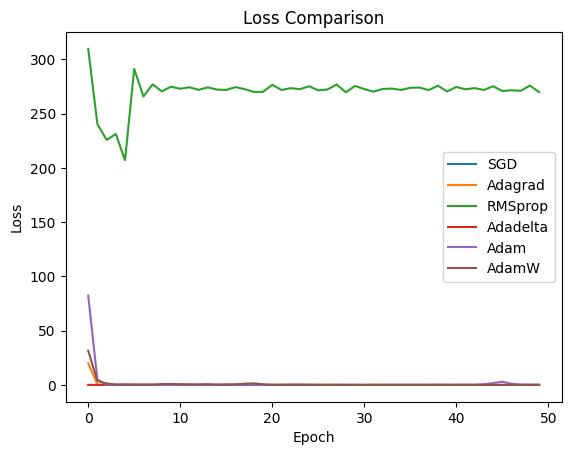

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras


def generate_sin_wave(seq_length, num_samples):
    X, Y = [], []
    for i in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        x = np.sin(np.linspace(start, start + np.pi, seq_length))
        y = np.sin(start + np.pi)
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)


SEQ_LENGTH = 20  #  輸入的時間步長
NUM_SAMPLES = 1000  # 訓練數據量
X_train, Y_train = generate_sin_wave(SEQ_LENGTH, NUM_SAMPLES)
X_train = np.expand_dims(X_train, axis=-1)
# 轉換為 (batch, seq_length, features)
Y_train = np.expand_dims(Y_train, axis=-1)  # (batch, 1)


def create_model(optimizer):
    model = Sequential(
        [
            SimpleRNN(32, return_sequences=False, input_shape=(SEQ_LENGTH, 1)),
            Dense(1),  # 輸出層
        ]
    )
    model.compile(loss="mse", optimizer=optimizer)
    return model


# 創建6個模型
model_sgd = create_model(optimizer=keras.optimizers.SGD(learning_rate=1.0))
model_adagrad = create_model(optimizer=keras.optimizers.Adagrad(learning_rate=1.0))
model_rmsprop = create_model(optimizer=keras.optimizers.RMSprop(learning_rate=1.0))
model_adadelta = create_model(optimizer=keras.optimizers.Adadelta(learning_rate=1.0))
model_adam = create_model(optimizer=keras.optimizers.Adam(learning_rate=1.0))
model_adamw = create_model(optimizer=keras.optimizers.AdamW(learning_rate=1.0))
print("Training with SGD...")
history_sgd = model_sgd.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0)
print("Training with Adagrad...")
history_adagrad = model_adagrad.fit(
    X_train, Y_train, epochs=50, batch_size=32, verbose=0
)
print("Training with RMSprop...")
history_rmsprop = model_rmsprop.fit(
    X_train, Y_train, epochs=50, batch_size=32, verbose=0
)
print("Training with Adadelta...")
history_adadelta = model_adadelta.fit(
    X_train, Y_train, epochs=50, batch_size=32, verbose=0
)
print("Training with Adam...")
history_adam = model_adam.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0)
print("Training with AdamW...")
history_adamw = model_adamw.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=0)

plt.plot(history_sgd.history["loss"], label="SGD")
plt.plot(history_adagrad.history["loss"], label="Adagrad")
plt.plot(history_rmsprop.history["loss"], label="RMSprop")
plt.plot(history_adadelta.history["loss"], label="Adadelta")
plt.plot(history_adam.history["loss"], label="Adam")
plt.plot(history_adamw.history["loss"], label="AdamW")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.legend()
plt.show()